# Answers

## Part A

α = .5

![alpha=.5](alpha.5.png)

α = 3

![alpha=3](alpha3.PNG)

α = 10

![alpha=10](alpha10.PNG)

## Part B

RQ becomes Squared Exponential covariance as α->∞. 

### Proof:

If we substitute |d|=|x-x'| and recognize that |d| is always being squared, we can reqrite the limit function as

\begin{equation*}
lim_{\alpha \to \infty} (1 + \frac{d^2}{2\alpha})^{-\alpha}
\end{equation*}

We can expand this out to get

\begin{equation*}
lim_{\alpha \to \infty} 1-\frac{d^2}{2}+\frac{d^4 (\alpha+1)}{8 \alpha}-\frac{d^6 ((\alpha+1) (\alpha+2))}{48 \alpha^2}+\frac{d^8 (\alpha+1) (\alpha+2) (\alpha+3)}{384 \alpha^3}-...
\end{equation*}

Noticing that α only appears in fractions with matching degree in both the numerator and the denominator, taking the limit as α->∞ clearly causes these terms to go away, leaving us with

\begin{equation*}
1-\frac{d^2}{2}+\frac{d^4}{8}-\frac{d^6}{48}+\frac{d^8}{384}-...
\end{equation*}

The series expansion of the exponential operator is

\begin{equation*}
e^X = \sum_{k=0}^{\infty} \frac{X^k}{k!}
\end{equation*}

so the expansion of the squared exponential function is
\begin{equation*}
e^{-\frac{d^2}{2}} = 1-\frac{d^2}{2}+\frac{d^4}{8}-\frac{d^6}{48}+\frac{d^8}{384}-...
\end{equation*}

which is clearly equivalent to the expansion of the rational quadratic function, as desired

## Part C

μ ± 1.96 times the square root of the diagonal of the covariance matrix

In [ ]:
uncertainty = 1.96 * np.sqrt(np.diag(cov))

## Part D

### Completed helper function:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    
    """TODO: Uncomment line below and modify expression to compute 95% confience interval for the objective function"""
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

### Code to model and plot GP:

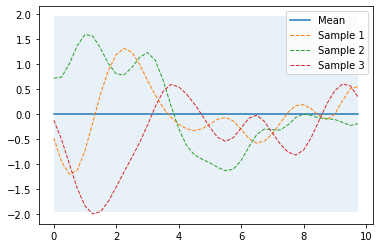

In [3]:
def sqdist(X):
    G = (X**2).reshape(-1,1)
    return G + G.T - 2 * np.dot(X,X.T)

def RQkernel(X, alpha):
    sqd = sqdist(X)
    return (1 + (sqd) / (2*alpha)) ** (-alpha)
    
X = np.arange(0,10,.25).reshape(-1,1) # define domain as described in problem and reshape to a column vector
u = np.zeros(X.shape) # define mean function as zero vector over domain
alpha = 3 # set alpha to desired value
cov = RQkernel(X, alpha) # generate covariance matrix
samples = np.random.multivariate_normal(u.ravel(), cov, 3) # sample prior
plot_gp(u, cov, X, samples=samples) # plot samples and mean

In [5]:
X.shape

(40, 1)

# Sources:

RQ Kernel found here: http://www.gaussianprocess.org/gpml/chapters/RW4.pdf

Helper code for plotting GP found here: https://github.com/krasserm/bayesian-machine-learning/blob/dev/gaussian-processes/gaussian_processes_util.py#L7

Part A graphs were generated using Wolfram Alpha

# Reflection

I felt that the problem was the proper level of difficulty, and I feel that my attempt to have each part of the problem logically flow into the next was successful. In terms of amount of time to solve the problem, this could vary drastically based on the prior knowledge of whoever is solving it. I feel part A should be extremely easy for anyone at this level, while part B is immediately solveable if you recognize series expansions are necessary, but otherwise could take a fair amount of trial and error if not. Similarly, the answer to part C relies directly on information found in the book on page 14 as well as understanding that σ is the square root of the diagonal of the covariance matrix, a fact not directly stated on p14. Part D then relies on basic mathematical programming skills, and I feel it is safe to assume students will have had some exposure to mathematical programming if they are in this course. Expecting students to figure out the graphical piece on their own would have made this problem take way too long, so I feel the incomplete helper function was very good, as it required an implemenation of the answer to part C.